In [43]:
# Imports and data load
print ("\n 1. Project Title : Data Science Capstone Project: Manufacturing Equipment Output Prediction with Linear Regression")
print ("\n 2. Category : Supervised Learning(Regression")
print("""\n 3. Problem Statement : You are working as a data analyst for a manufacturing company that operates injection molding machines to produce plastic components. The company wants to optimize production efficiency by predicting the hourly output (number of parts produced per hour) based on various machine operating parameters. Your task is to build a linear regression model that can predict machine output using factors like temperature, pressure, cycle time, and material properties. This will help the production team optimize machine settings, plan production schedules, and identify when machines are underperforming.
""")
print("""\n 4. Objective:
•	Build a linear regression model to predict hourly machine output using operating parameters like temperature, pressure, cycle time, and material properties.
•	Use predictions to optimize machine settings, improve production efficiency, plan schedules, and detect underperforming machines.""")

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



 1. Project Title : Data Science Capstone Project: Manufacturing Equipment Output Prediction with Linear Regression

 2. Category : Supervised Learning(Regression

 3. Problem Statement : You are working as a data analyst for a manufacturing company that operates injection molding machines to produce plastic components. The company wants to optimize production efficiency by predicting the hourly output (number of parts produced per hour) based on various machine operating parameters. Your task is to build a linear regression model that can predict machine output using factors like temperature, pressure, cycle time, and material properties. This will help the production team optimize machine settings, plan production schedules, and identify when machines are underperforming.


 4. Objective:
•	Build a linear regression model to predict hourly machine output using operating parameters like temperature, pressure, cycle time, and material properties.
•	Use predictions to optimize machine 

In [48]:
#Load Dataset
df = pd.read_csv("D:\MUFG\manufacturing_dataset_1000_samples project1.csv")
df.head()

,Timestamp,Injection_Temperature,Injection_Pressure,Cycle_Time,Cooling_Time,Material_Viscosity,Ambient_Temperature,Machine_Age,Operator_Experience,Maintenance_Hours,Shift,Machine_Type,Material_Grade,Day_of_Week,Temperature_Pressure_Ratio,Total_Cycle_Time,Efficiency_Score,Machine_Utilization,Parts_Per_Hour
0,2023-01-01 00:00:00,221.0,136.0,28.7,13.6,375.5,28.0,3.8,11.2,64,Evening,Type_B,Economy,Thursday,1.625,42.3,0.063,0.510,36.5
1,2023-01-01 01:00:00,213.3,128.9,34.5,14.0,215.8,22.6,6.8,6.3,58,Night,Type_A,Standard,Wednesday,1.655,48.5,0.037,0.389,29.9
2,2023-01-01 02:00:00,222.8,115.9,19.9,9.5,307.0,25.3,4.2,9.6,47,Day,Type_A,Standard,Monday,1.922,29.4,0.061,0.551,56.9
3,2023-01-01 03:00:00,233.3,105.3,39.2,13.1,137.8,26.0,9.2,8.6,49,Evening,Type_A,Premium,Saturday,2.215,52.3,0.054,0.293,31.0
4,2023-01-01 04:00:00,212.2,125.5,45.0,9.9,298.2,23.6,6.2,23.0,49,Night,Type_B,Premium,Monday,1.691,54.9,0.145,0.443,15.0


In [49]:
#to know the shape of dataset
df.shape

(1000, 19)

In [50]:
#  Drop unnecessary column TimeStamp
if "Timestamp" in df.columns:
    df.drop("Timestamp", axis=1, inplace=True)

In [51]:
#  Handle Missing Values
# Fill numeric missing values with median
num_cols = ["Material_Viscosity", "Ambient_Temperature", "Operator_Experience"]
for col in num_cols:
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)

In [52]:
# . Encode Categorical Columns
cat_cols = ["Shift", "Machine_Type", "Material_Grade", "Day_of_Week"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [53]:
#  Define Features (X) and Target (y)
X = df.drop("Parts_Per_Hour", axis=1)
y = df["Parts_Per_Hour"]

In [54]:
#  Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
#  Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
#  Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [60]:
# finding the MSE , RMSE , R2 score and the relative error percentage (Evaluation criteria)
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

# Relative error (% of average target value)
print("Relative Error (%):", (rmse / y_test.mean()) * 100)

#R² = 0.96 → Very strong fit (96% of variation in actual values is explained by the model).
#Relative Error ≈ 12.5% → On average, predictions are within ~12.5% of actuals.

MSE : 12.304058592334068
RMSE: 3.507714154878369
R²  : 0.9057108598984055
Relative Error (%): 12.527326850871837


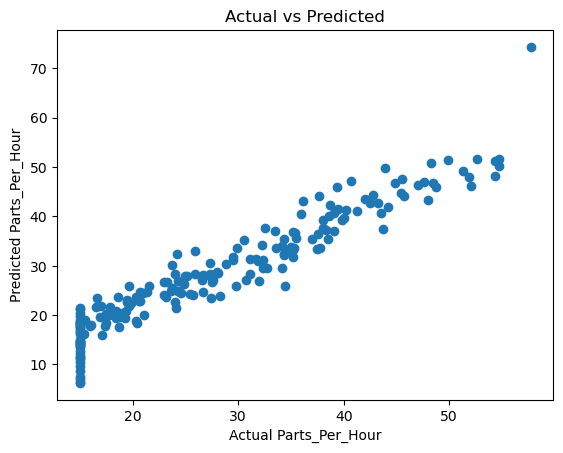

In [61]:
#  Visualization
# The points are clustered around the diagonal, which shows your model is predicting quite well.
# There is some spread, meaning not every prediction is exact, but the general trend is correct.
# For smaller values (10–30), predictions look tighter and closer to actuals.

For larger values (50–70), the spread increases → the model struggles a bit more there.
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Parts_Per_Hour")
plt.ylabel("Predicted Parts_Per_Hour")
plt.title("Actual vs Predicted")
plt.show()